In [1]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

learn_data = [[0,0],[1,0],[0,1],[1,1]]
learn_label = [0,0,0,1]

svm = LinearSVC()
svm.fit(learn_data, learn_label)

X_test = [[0,0],[1,0],[0,1],[1,1]]
pred = svm.predict(X_test)

print(X_test, pred)
print(accuracy_score([0,0,0,1],pred))

[[0, 0], [1, 0], [0, 1], [1, 1]] [0 0 0 1]
1.0


In [2]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X_train = [[0,0],[1,0],[0,1],[1,1]]
y_train = [0,1,1,0]

# svm = SVC(kernel='linear') # 선형, 예측모델 점수 0.5
svm = SVC(kernel='rbf') # 비선형
svm.fit(X_train, y_train)

X_test = [[0,0],[1,0],[0,1],[1,1]]
pred = svm.predict(X_test)

print(X_test, pred)
print(accuracy_score([0,1,1,0],pred))

[[0, 0], [1, 0], [0, 1], [1, 1]] [0 1 1 0]
1.0


In [3]:
import numpy as np
X = np.array([[1,2],[1.5,3],[3.5,4],[4,5],[6,2],[7,5],[9,4],[8,2]])
y = [0,0,0,0,1,1,1,1]

from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(X,y)

SVC(kernel='linear')

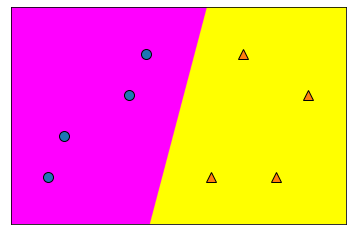

In [4]:
import mglearn
import matplotlib.pyplot as plt

mglearn.plots.plot_2d_classification(model, X, cm='spring')
mglearn.discrete_scatter(X[:,0],X[:,1],y)

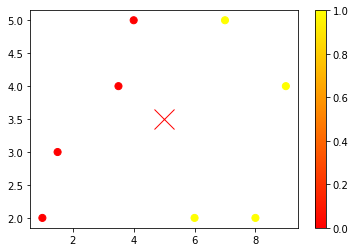

In [5]:
%matplotlib inline

plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="autumn")
plt.plot([5],[3.5],'x',color='red',markersize=20)
plt.colorbar()
plt.show()

In [6]:
print(model.predict([[5,3.5]]))

[0]


In [7]:
print(model.support_vectors_)

[[4. 5.]
 [6. 2.]
 [7. 5.]]


In [8]:
model.support_ # 서포트 벡터의 인덱스

array([3, 4, 5], dtype=int32)

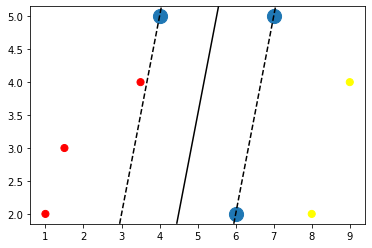

In [9]:
def plot_svc(model,ax=None):
    if ax == None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    x = np.linspace(xlim[0],xlim[1],30)
    y = np.linspace(ylim[0],ylim[1],30)
    Y, X = np.meshgrid(y,x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    ax.contour(X, Y, P, levels=[-1,0,1], colors='k', linestyles=['--','-','--'])

    ax.scatter(model.support_vectors_[:,0], model.support_vectors_[:,1], s=200)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="autumn")
plot_svc(model)

In [ ]:
# 무작위데이터(blobs)

In [21]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, centers=2, cluster_std=0.5, random_state=0)

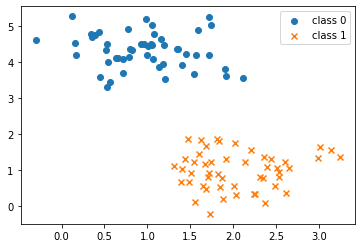

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(X[y == 0,0], X[y == 0,1], marker='o', label="class 0")
plt.scatter(X[y == 1,0], X[y == 1,1], marker='x', label="class 1")
plt.legend()
plt.show()

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=10)

In [23]:
from sklearn.svm import SVC
model = SVC(kernel='linear').fit(X_train, y_train)
model.n_support_ # 서포트 벡터의 숫자, 0 2개, 1 1개

array([2, 1], dtype=int32)

In [24]:
model.support_

array([18, 43, 13], dtype=int32)

In [25]:
model.support_vectors_ # 서포트 벡터의 실제 좌표값

array([[0.5323772 , 3.31338909],
       [2.11114739, 3.57660449],
       [1.46870582, 1.86947425]])

In [26]:
def plot_svc(model,ax=None):
    if ax == None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    x = np.linspace(xlim[0],xlim[1],30)
    y = np.linspace(ylim[0],ylim[1],30)
    Y, X = np.meshgrid(y,x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    ax.contour(X, Y, P,
    levels=[-1,0,1], colors='k', 
    linestyles=['--','-','--'])

    ax.scatter(model.support_vectors_[:,0], 
    model.support_vectors_[:,1], 
    s=200)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

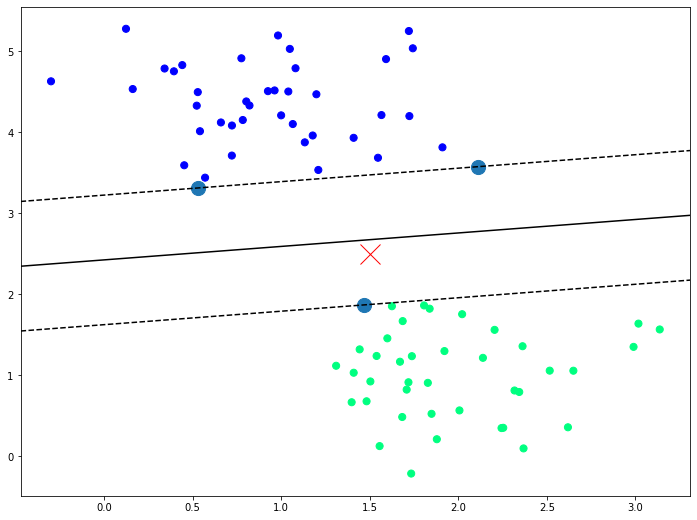

In [27]:
plt.figure(figsize=(12,9))
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,s=50,cmap="winter")
X_new = [1.5, 2.5]
plt.plot(X_new[0],X_new[1],'x',color='red',markersize=20)
plot_svc(model)

In [28]:
model.predict([[1.5, 2.5]])

array([1])

In [29]:
from sklearn.model_selection import GridSearchCV

# C는 cost, 오차에 대한 패널티, c 값을 증가시키면 모델이 좀 더 복잡해짐=좀 더 자세하게 결정경계를 정함
# 뒤에 더 자세하게 나온댕~
params = {'C':[0.1, 1, 10, 100], 'gamma':[1, 0.1, 0.01, 0.001, 0.0001, 10]}
grid = GridSearchCV(SVC(), params)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 0.1, 'gamma': 1}
SVC(C=0.1, gamma=1)


In [30]:
model = grid.best_estimator_
model

SVC(C=0.1, gamma=1)

In [31]:
pred = model.predict(X_test)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

1.0
1.0


In [ ]:
# 올리베티 얼굴 데이터셋

In [45]:
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces()
print(len(faces.data))

400


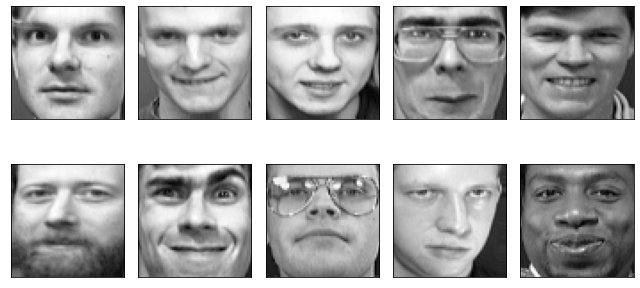

In [46]:
N = 2
M = 5
np.random.seed(0)
fig = plt.figure(figsize=(9,5))
klist = np.random.choice(range(len(faces.data)), N*M) # 400장 중에 10장 샘플링

for i in range(N):
    for j in range(M):
        k = klist[i*M+j]
        ax = fig.add_subplot(N, M, i*M+j+1)
        ax.imshow(faces.images[k], cmap=plt.cm.gray) # 이미지 출력 함수
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
plt.tight_layout()
plt.show()

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, stratify=faces.target, test_size=0.2, random_state=0)

In [48]:
from sklearn.svm import SVC
svc = SVC().fit(X_train,y_train)

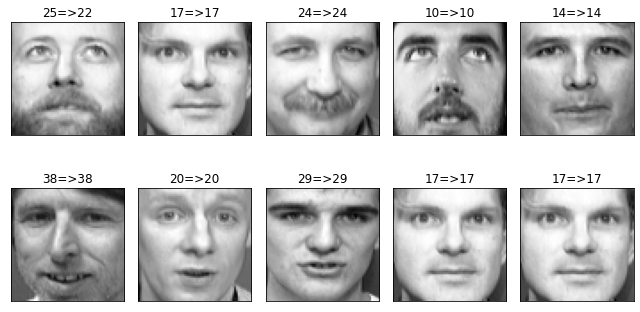

In [49]:
N = 2
M = 5
np.random.seed(4)
fig = plt.figure(figsize=(9,5))
klist = np.random.choice(range(len(y_test)), N*M)

for i in range(N):
    for j in range(M):
        k = klist[i*M+j]
        ax = fig.add_subplot(N, M, i*M+j+1)
        ax.imshow(X_test[k:(k+1), :].reshape(64,64), cmap=plt.cm.gray) # reshape()로 2차원으로 바꿔줘야함
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        pred = svc.predict(X_test[k:(k+1), :])[0]
        plt.title(f"{y_test[k]}=>{pred}")
plt.tight_layout()
plt.show()

In [50]:
print(svc.score(X_train, y_train))
print(svc.score(X_test, y_test))

1.0
0.95


In [51]:
from sklearn.metrics import classification_report
pred = svc.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      1.00      1.00         2
           2       0.67      1.00      0.80         2
           3       1.00      1.00      1.00         2
           4       1.00      0.50      0.67         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      0.50      0.67         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         2
          17       1.00    

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa